### BOW with Basic features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
new_df = df.sample(50000 , random_state=2)

In [4]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

Repeated Values: is_duplicate
0    31601
1    18399
Name: count, dtype: int64


<Axes: xlabel='is_duplicate'>

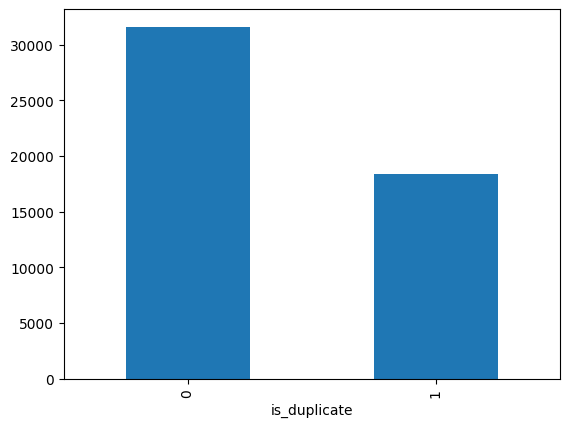

In [5]:
print('Repeated Values:' , new_df['is_duplicate'].value_counts())
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [6]:
qid = pd.Series(new_df['qid1'].tolist())+pd.Series(new_df['qid2'].tolist())
print('Number of unique question' , np.unique(qid).shape[0])

Number of unique question 49069


In [7]:
X = qid.value_counts()>1
print('Number of repeated Questions:' , X.sum())

Number of repeated Questions: 918


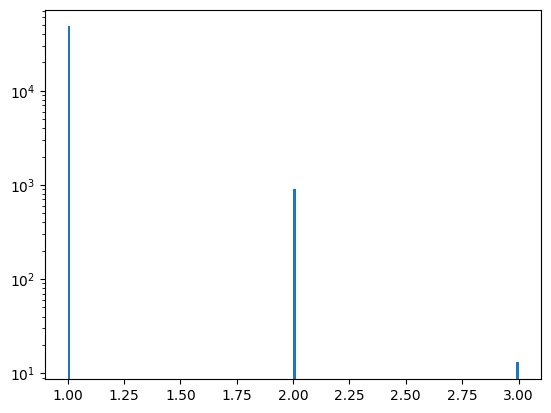

In [8]:
plt.hist(qid.value_counts().values , bins = 160)
plt.yscale('log')
plt.show()

In [9]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [10]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda x : len(x.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda x : len(x.split(" ")))

In [11]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [12]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" "))) 
    return len(w1 & w2)

In [13]:
new_df['word_common'] = new_df.apply(common_words, axis =1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [14]:
def total_words( row):
    w1 = set(map( lambda word : word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word : word.lower().strip() , row['question2'].split(" ")))
    return len(w1)+len(w2)

In [15]:
new_df['total_words'] = new_df.apply(total_words , axis = 1)

In [16]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [17]:
new_df['word_share'] = round(new_df['word_common'] / new_df['total_words'] , 2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


#### Analysis of features

Minimum characters 1
Minimum characters 391
Average num of characters 59


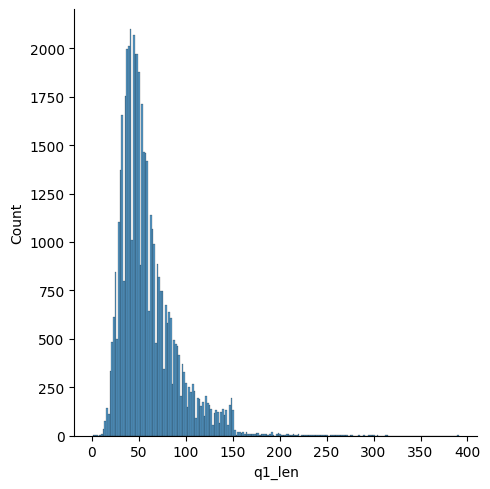

In [18]:
sns.displot(new_df['q1_len'])
print('Minimum characters' , new_df['q1_len'].min())
print('Minimum characters' , new_df['q1_len'].max())
print('Average num of characters' , int(new_df['q1_len'].mean()))

Minimum characters 6
Maximum characters  1151
Average characters  60


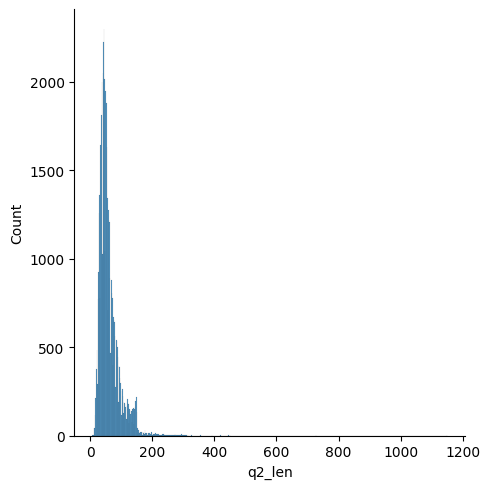

In [19]:
sns.displot(new_df['q2_len'])
print('Minimum characters' , new_df['q2_len'].min())
print('Maximum characters ', new_df['q2_len'].max())
print('Average characters ', int(new_df['q2_len'].mean()))

minimum words 1
maximum words 72
average num of words 10


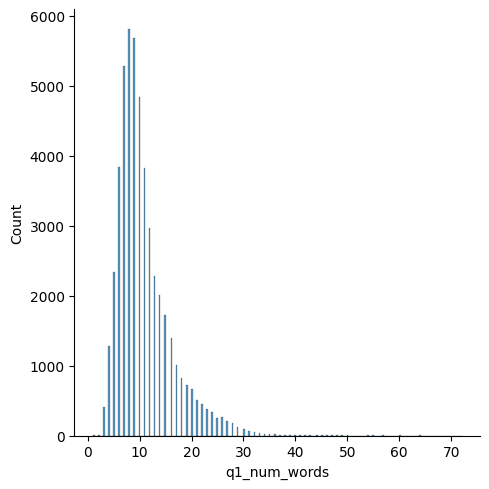

In [20]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


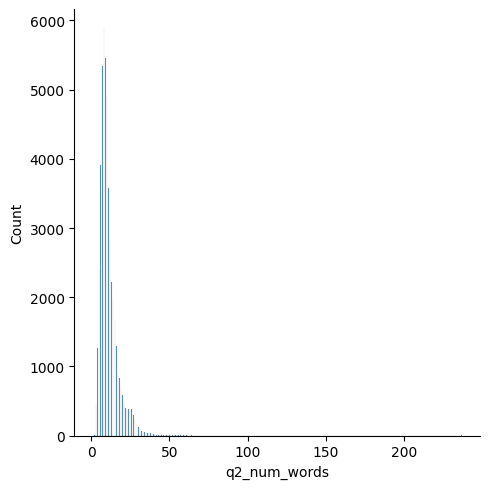

In [21]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

minimum words 0
maximum words 38
average num of words 4


C:\Users\DELL\AppData\Local\Temp\ipykernel_5544\2111299760.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
C:\Users\DELL\AppData\Local\Temp\ipykernel_5544\2111299760.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

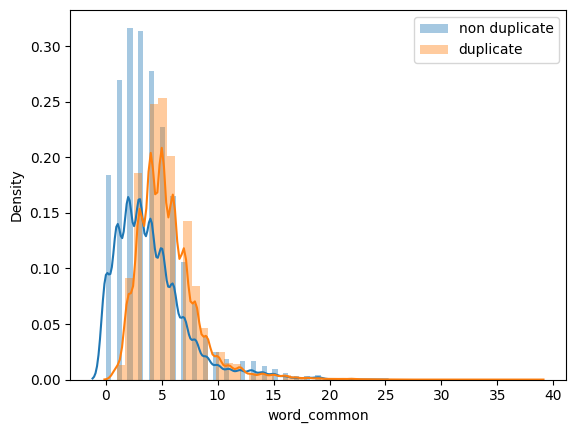

In [22]:
# Common words
#sns.displot(new_df['word_common'])
print('minimum words',new_df['word_common'].min())
print('maximum words',new_df['word_common'].max())
print('average num of words',int(new_df['word_common'].mean()))
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5544\3772667091.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['total_words'] , label= 'non duplicate')
C:\Users\DELL\AppData\Local\Temp\ipykernel_5544\3772667091.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

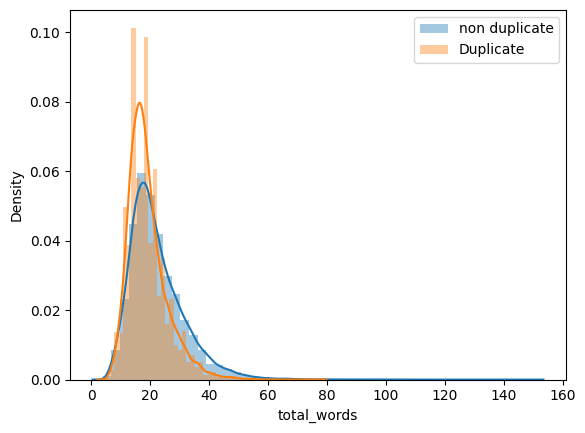

In [23]:
# Total Words
sns.distplot(new_df[new_df['is_duplicate']==0]['total_words'] , label= 'non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['total_words'] , label = 'Duplicate')
plt.legend()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5544\726846438.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'] , label = 'non duplicate')
C:\Users\DELL\AppData\Local\Temp\ipykernel_5544\726846438.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

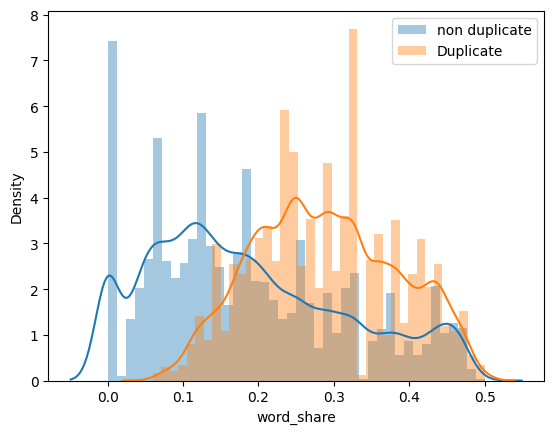

In [24]:
# Word Share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'] , label = 'non duplicate')
sns.distplot(new_df[new_df['is_duplicate' ]== 1]['word_share'] , label = 'Duplicate')
plt.legend()
plt.show()

In [25]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


In [26]:
ques_df = new_df[['question1' , 'question2']]

In [27]:
final_df = new_df.drop(columns=['id' , 'qid1' , 'qid2' , 'question1' , 'question2'])
print(final_df.shape)
final_df.head()

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)

In [29]:
questions = list(ques_df['question1'])+list(ques_df['question2'])
q1_arr , q2_arr =  np.vsplit(cv.fit_transform(questions).toarray() , 2)

In [30]:
temp_df1 = pd.DataFrame(q1_arr , index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr , index = ques_df.index)
temp_df = pd.concat([temp_df1 , temp_df2] , axis=1)
temp_df.shape

(50000, 6000)

In [31]:
final_df = pd.concat([final_df , temp_df] , axis =1)
print(final_df.shape)
final_df.head()

(50000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,1,0,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test  = train_test_split(temp_df.iloc[: , 1:].values , temp_df.iloc[: , 0].values , test_size= 0.2 , random_state=1)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train , Y_train)
ypred = rf.predict(X_test)
accuracy_score(Y_test , ypred)

0.9986